In [1]:
import numpy as np

In [11]:
def dot_of(a, b):
    summed = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            print(i, j, a[i][j], b[j][i])
    
    return summed

In [14]:
A = np.array([[2, 0], [1, 5]])
B = np.array([3, 4])

In [15]:
eig_val, eig_vec = np.linalg.eig(A)

In [16]:
eig_val

array([5., 2.])

In [17]:
eig_vec

array([[ 0.        ,  0.9486833 ],
       [ 1.        , -0.31622777]])

In [19]:
np.dot(eig_val, eig_vec)

array([1.8973666 , 4.36754447])

In [20]:
np.dot(eig_vec, eig_val)

array([1.8973666 , 4.36754447])

In [21]:
import pandas as pd

In [44]:
df

,England,N Ireland,Scotland,Wales,Features
0,375,135,458,475,Alcoholic drinks
1,57,47,53,73,Beverages
2,245,267,242,227,Carcase meat
3,1472,1494,1462,1582,Cereals
4,105,66,103,103,Cheese
5,54,41,62,64,Confectionery
6,193,209,184,235,Fats and oils
7,147,93,122,160,Fish
8,1102,674,957,1137,Fresh fruit
9,720,1033,566,874,Fresh potatoes


In [23]:
df = pd.read_excel('data/pca_uk.xlsx')

In [32]:
X = df.loc[:, df.columns[:-1]].values

In [33]:
X

array([[ 375,  135,  458,  475],
       [  57,   47,   53,   73],
       [ 245,  267,  242,  227],
       [1472, 1494, 1462, 1582],
       [ 105,   66,  103,  103],
       [  54,   41,   62,   64],
       [ 193,  209,  184,  235],
       [ 147,   93,  122,  160],
       [1102,  674,  957, 1137],
       [ 720, 1033,  566,  874],
       [ 253,  143,  171,  265],
       [ 685,  586,  750,  803],
       [ 488,  355,  418,  570],
       [ 198,  187,  220,  203],
       [ 360,  334,  337,  365],
       [1374, 1506, 1572, 1256],
       [ 156,  139,  147,  175]])

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [36]:
pca = PCA(n_components=2)

In [45]:
transformed = pca.fit_transform(X.T)

In [46]:
transformed

array([[-144.99315218,   -2.53299944],
       [ 477.39163882,  -58.90186182],
       [ -91.869339  ,  286.08178613],
       [-240.52914764, -224.64692488]])

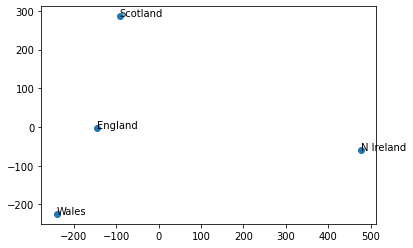

In [50]:
plt.scatter(transformed[:, 0], transformed[:, 1])
for name, (x, y) in zip(df.columns[:-1], transformed):
    plt.text(x, y, name)

In [51]:
def r(items):
    return items[::-1]

In [52]:
r([2, 3, 4])

[4, 3, 2]

In [148]:
def center_matrix(X):
    return np.array([X[:, col_num] - np.mean(X[:, col_num]) for col_num in range(X.shape[1])]).T

In [155]:
def pca(X, n_components=2):
    centered = center_matrix(X)
    print(centered)
    eig_val, eig_vec = np.linalg.eig(np.cov(centered))
    sorted_vals = np.argsort(eig_val)[-n_components:][::-1]
    print(sorted_vals)
    print("eig vec", eig_vec[:, sorted_vals])
    print("centered", centered)
    return np.dot(eig_vec[:, sorted_vals].T, centered)

In [156]:
pca(A)

[[ 0.   -1.5  -0.75]
 [ 0.   -0.5  -0.75]
 [ 0.    0.5   0.25]
 [ 0.    1.5   1.25]]
[0 1]
eig vec [[-0.63281645  0.59122191]
 [-0.27179185 -0.71376644]
 [ 0.21093882 -0.19707397]
 [ 0.69366948  0.3196185 ]]
centered [[ 0.   -1.5  -0.75]
 [ 0.   -0.5  -0.75]
 [ 0.    0.5   0.25]
 [ 0.    1.5   1.25]]


array([[ 0.        ,  2.23109423,  1.59827778],
       [ 0.        , -0.14905888,  0.44216303]])

In [157]:
eig_vec

array([[-0.63281645,  0.59122191, -0.03786412,  0.37621558],
       [-0.27179185, -0.71376644,  0.36921189,  0.64511685],
       [ 0.21093882, -0.19707397, -0.85201612, -0.16158696],
       [ 0.69366948,  0.3196185 ,  0.36921189,  0.64511685]])

In [151]:
A

array([[1, 1, 1],
       [1, 2, 1],
       [1, 3, 2],
       [1, 4, 3]])

In [131]:
PCA(n_components=2).fit_transform(A)

array([[-1.65392786, -0.2775295 ],
       [-0.84584087,  0.31153366],
       [ 0.55130929,  0.09250983],
       [ 1.94845944, -0.126514  ]])

In [104]:
np.argsort(eig_val)

array([2, 3, 1, 0])

In [123]:
eig_vec

array([[-0.63281645,  0.59122191, -0.03786412,  0.37621558],
       [-0.27179185, -0.71376644,  0.36921189,  0.64511685],
       [ 0.21093882, -0.19707397, -0.85201612, -0.16158696],
       [ 0.69366948,  0.3196185 ,  0.36921189,  0.64511685]])

In [122]:
eig_vec[:, [1, 2]]

array([[ 0.59122191, -0.03786412],
       [-0.71376644,  0.36921189],
       [-0.19707397, -0.85201612],
       [ 0.3196185 ,  0.36921189]])

In [79]:
eig_val

array([1.32212166e+00, 9.45450057e-02, 3.99762102e-18, 7.89185006e-17])

In [80]:
eig_vec

array([[-0.63281645,  0.59122191, -0.03786412,  0.37621558],
       [-0.27179185, -0.71376644,  0.36921189,  0.64511685],
       [ 0.21093882, -0.19707397, -0.85201612, -0.16158696],
       [ 0.69366948,  0.3196185 ,  0.36921189,  0.64511685]])

In [76]:
center_matrix(A)

array([[ 0.  , -1.5 , -0.75],
       [ 0.  , -0.5 , -0.75],
       [ 0.  ,  0.5 ,  0.25],
       [ 0.  ,  1.5 ,  1.25]])

In [56]:
A = np.array([
    [1, 1, 1], 
    [1, 2, 1], 
    [1, 3, 2], 
    [1, 4, 3]]
)

In [ ]:
0, 1 | 0, 2 | 1, 2 | 0, 0

In [59]:
10/ 4

2.5

In [ ]:
split dataset
apply pca on x_train and obtain number of pc -> pca.explained_variance_ratio().cumsum()
apply data normalization
fit linear model
obtain x_test scaled reduced
predict on x_test